# AMIGA-ALMA

Summary of the ALMA observations for AMIGA with (when needed) upper limits for surface density

In [98]:
## import
import numpy as np
from math import *
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

In [99]:
def surface_density(ICO, D, inclination):
    "molecular gas surface density for ICO (Jy.km/s) and distance D (Mpc)"
    
    beam=3.14159*6.8*5.5/(4.*log(2.))
    dxdy=1.
    dxypc=(1.*41.6)**2


    mco=1.2e4*ICO*D*dxdy/beam
    h2dens=cos(inclination*pi/180.)*mco/dxypc
    
    return h2dens

In [100]:
### plot image with contours..
def plot_image(fitsfile, rms , cont_lev):

    multp = np.array(cont_lev) # sigma

    lev = rms*multp

    fig = aplpy.FITSFigure(fitsfile);
    fig.add_beam()
    fig.beam.set_color('black')
    fig.add_scalebar(1 * u.arcsecond)
    fig.scalebar.set_label('1 arcsec')
    fig.scalebar.set_color("black")
    fig.show_colorscale()
    fig.show_contour(fitsfile, colors='green', levels=lev, alpha=0.5);

## CIG 1017

Not detected in continuum and lines

Continuum : rms 40 muJy
Lines : rms 3 mJy

In [101]:
## Surface density  assuining a 150 km/s line
print surface_density(3*3*150*1e-3, 170, 0.)

37.5527390141


# CIG 1019

Continuum : not detected. rms noise 34 muJy 

INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Auto-setting vmin to -1.201e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.224e-04 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


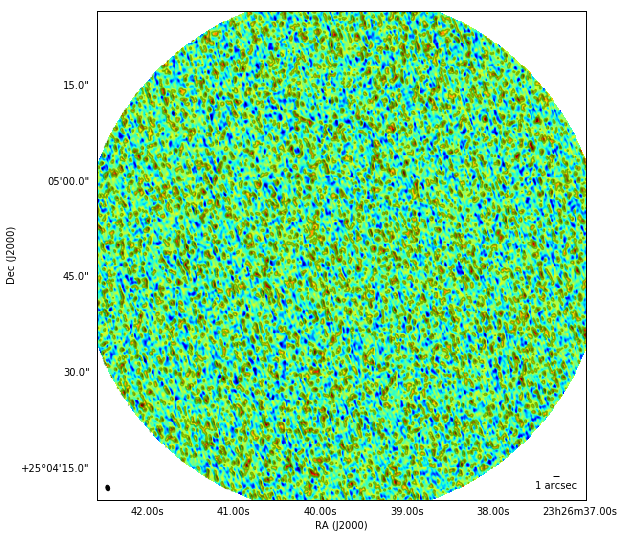

In [102]:
plot_image('CIG1019_cont.fits',34e-6, [1,2])

CO(1-0): line strongly detected and spatially resolved.
Below the moment 0 of CO(1-0)

INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Auto-setting vmin to  2.713e-02 [aplpy.core]
INFO: Auto-setting vmax to  6.067e-01 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


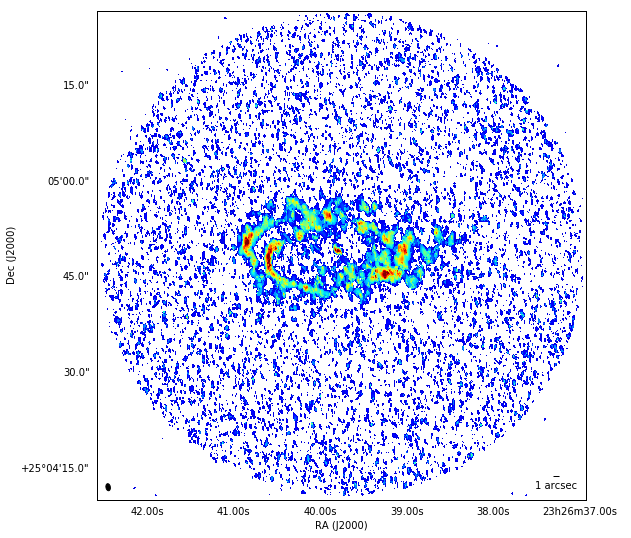

In [103]:
plot_image('CIG1019_spw_2_6.image.mom0.fits',1e-1,[50])